# Principle Component Analysis:

https://medium.com/@raghavan99o/principal-component-analysis-pca-explained-and-implemented-eeab7cb73b72


In [45]:
# Import relevant modules and produce Sample Data:

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

vec1 = np.array([0, 0, 0])
mat1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_for_class1 = np.random.multivariate_normal(vec1, mat1, 20).T
assert sample_for_class1.shape == (3, 20), "The dimension of the sample_for_class1 matrix is not 3x20"

vec2 = np.array([1, 1, 1])
mat2 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
sample_for_class2 = np.random.multivariate_normal(vec2, mat2, 20).T
assert sample_for_class2.shape == (3, 20), "The dimension of the sample_for_class2 matrix is not 3x20"

all_data = np.concatenate((sample_for_class1, sample_for_class2), axis=1)
assert all_data.shape == (3, 40), "The dimension of the all_data matrix is not 3x20"

In [46]:
# Calculate Covariance (Scatter) Matrix for centered Sample Data:

mean_dim1 = np.mean(all_data[0, :])
mean_dim2 = np.mean(all_data[1, :])
mean_dim3 = np.mean(all_data[2, :])

mean_vector = np.array([[mean_dim1], [mean_dim2], [mean_dim3]])

print('The Mean Vector:\n', mean_vector)

scatter_matrix = np.zeros((3,3))
for i in range(all_data.shape[1]):
    scatter_matrix += (all_data[:, i].reshape(3, 1) - mean_vector).dot((all_data[:, i].reshape(3, 1) - mean_vector).T)
print('The Scatter Matrix is :\n', scatter_matrix)

The Mean Vector:
 [[0.41667492]
 [0.69848315]
 [0.49242335]]
The Scatter Matrix is :
 [[38.4878051  10.50787213 11.13746016]
 [10.50787213 36.23651274 11.96598642]
 [11.13746016 11.96598642 49.73596619]]


In [50]:
# Select Eigenvalues and Eigenvectors using the built-in Function on the Scatter Matrix:

eig_val, eig_vec = np.linalg.eig(scatter_matrix)
eig_val

array([65.16936779, 32.69471296, 26.59620328])

In [51]:
# Eigenvectors (columns!!, not rows):
eig_vec

array([[-0.49210223, -0.64670286,  0.58276136],
       [-0.47927902, -0.35756937, -0.8015209 ],
       [-0.72672348,  0.67373552,  0.13399043]])

In [58]:
# Validation check that Eigenvectors are normed vectors of unit length:  (but done incorrectly!!!):
for ev in eig_vec:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev)) # ???? Eigenvectors are the columns not rows!!!
    
for ev in eig_vec:
    print(ev)
    print(np.linalg.norm(ev))

[-0.49210223 -0.64670286  0.58276136]
1.0000000000000007
[-0.47927902 -0.35756937 -0.8015209 ]
0.9999999999999997
[-0.72672348  0.67373552  0.13399043]
0.9999999999999998


https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html

above validation check is not correct: the eigenvectors are the columns of the output, not the rows!!!!

below, the eigenvectors are correctly selected as rows ( eig_vec[: , i])

In [53]:
# We Make a list of tuple containing (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

# We then Sort list of tuples by the eigenvalue
eig_pairs.sort(key=lambda x: x[0], reverse=True)
#eig_pairs.sort(key=lambda x: x[1][2], reverse=True)

# verify that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0], i[1])
    print(np.linalg.norm(i[1]))  # correct validation check of length of Eigenvectors: 1 !!

65.16936779078195 [-0.49210223 -0.47927902 -0.72672348]
1.0
32.69471296321796 [-0.64670286 -0.35756937  0.67373552]
1.0
26.596203282097097 [ 0.58276136 -0.8015209   0.13399043]
0.9999999999999999


In [54]:
# Select two most important PCs, Eigenvectors (as columns):

matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.49210223 -0.64670286]
 [-0.47927902 -0.35756937]
 [-0.72672348  0.67373552]]


In [55]:
# Transform original data into new coordinate system with PC1 and PC2 as new axes:

transformed = matrix_w.T.dot(all_data)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
transformed.shape

(2, 40)

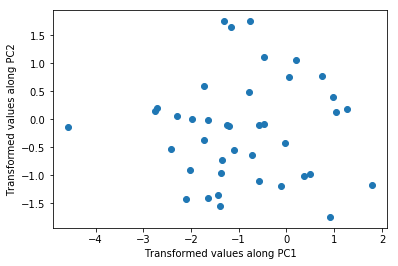

In [57]:
# Plot new transformed data points:

plt.scatter(transformed[0, :], transformed[1, :])
plt.xlabel('Transformed values along PC1')
plt.ylabel('Transformed values along PC2')
plt.show()